In [1]:
from IPython.display import Image

# Comparison of Clustering Techniques

Source:

- Sina Nazeri, Comparing The-State-of-The-Art Clustering Algorithms, https://medium.com/@sina.nazeri/comparing-the-state-of-the-art-clustering-algorithms-1e65a08157a1
- Amy @GrabNGoInfo, 4 Clustering Model Algorithms in Python and Which is the Best, https://medium.com/grabngoinfo/4-clustering-model-algorithms-in-python-and-which-is-the-best-7f3431a6e624
- Gursev Pirge, A Comparative Study of Various Clustering Algorithms, https://gursev-pirge.medium.com/a-comparative-study-of-various-clustering-algorithms-c356fc427a40

### Which Model to Use?

- If the clusters in the dataset are in ellipsoidal shape and with different densities, we can use GMM or hierarchical model.

- Any of the four clustering model algorithms work well with the dataset with ellipsoidal shape clusters and similar density.

- For the non-ellipsoidal-shaped clusters, we can only choose from DBSCAN and hierarchical model, and DBSCAN model does not work well for the clusters with different densities.
- 
- Hierarchical clustering model is the most flexible, and it can be used for datasets with any shape and density.

- In addition to data shape and density, if there is a need to generate new data points for clusters, we need to use GMM because GMM is a generative model.


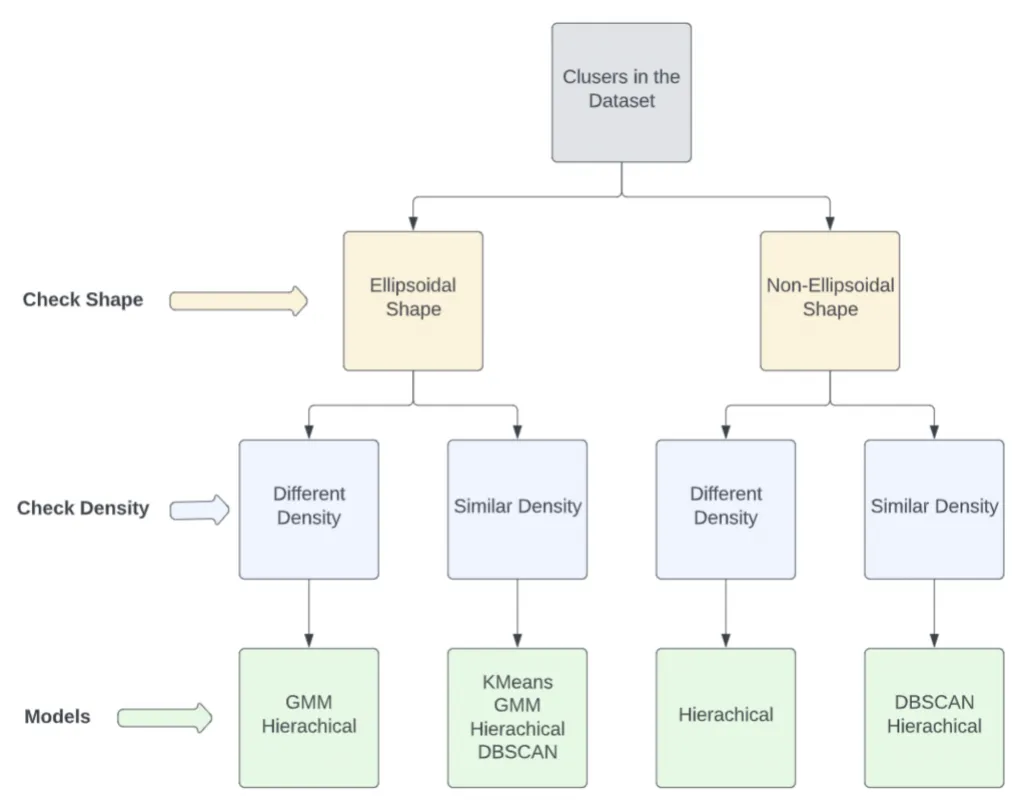

In [2]:
Image(filename="figures/clustering1.png", width=500)

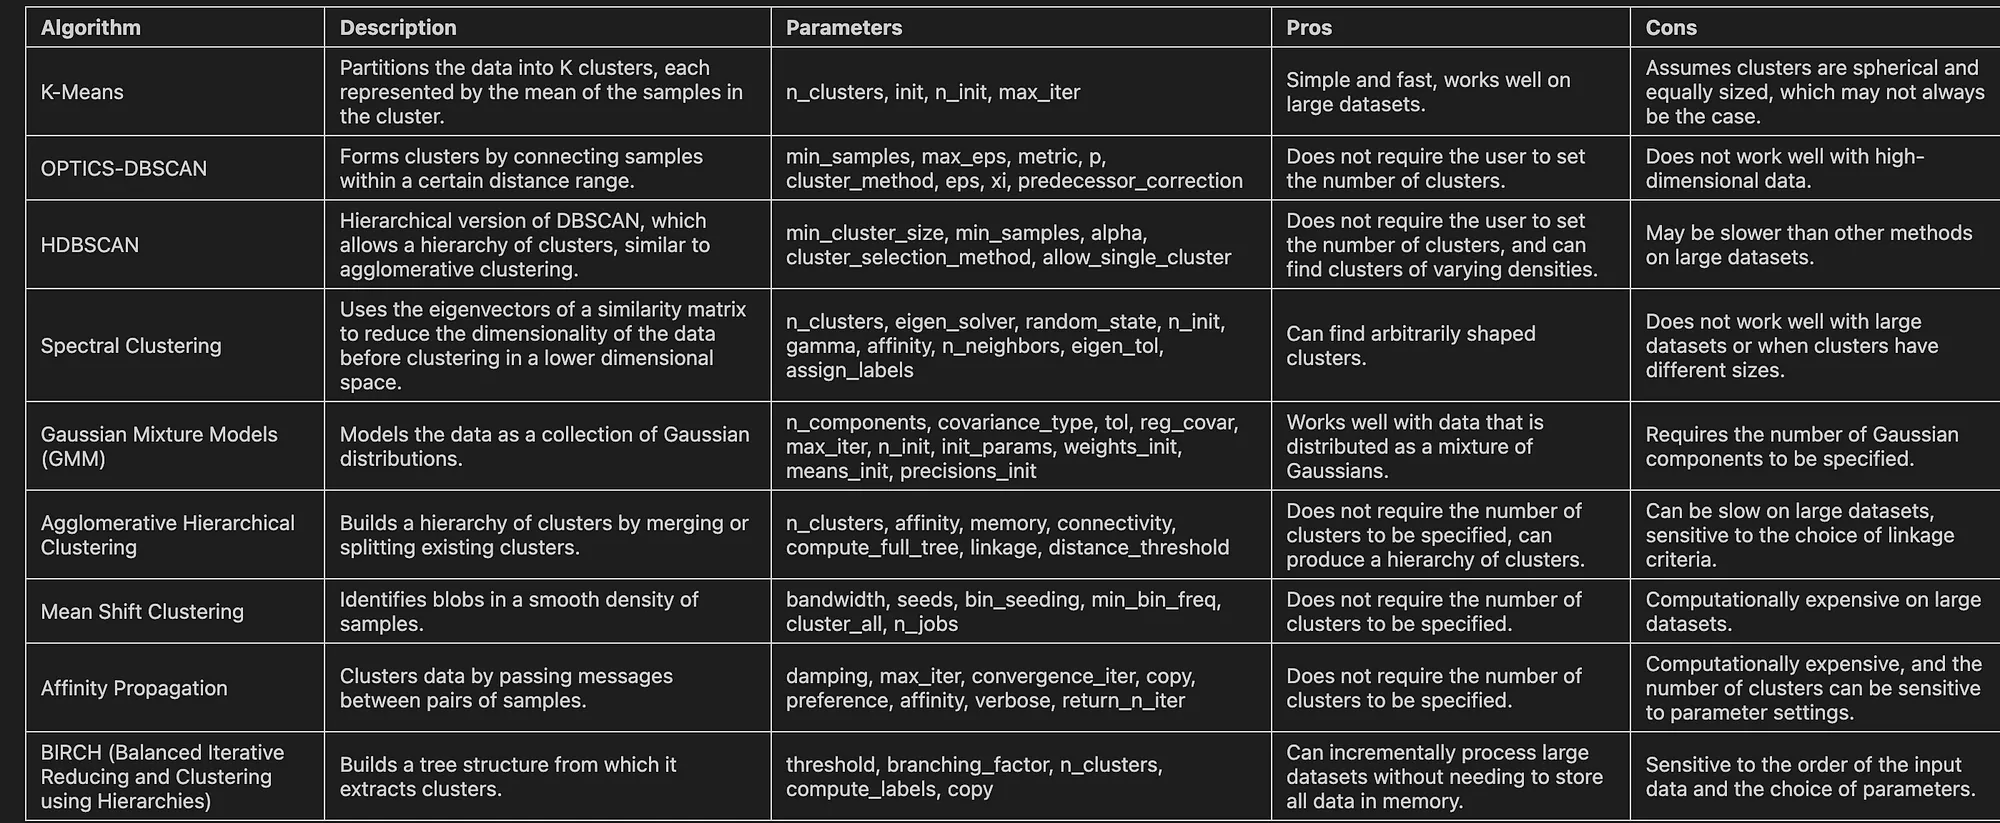

In [3]:
Image(filename="figures/clustering2.png", width=1200)

In [4]:
!pip install hdbscan

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [6]:
import numpy as np
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.cluster import KMeans, OPTICS, SpectralClustering, AgglomerativeClustering, HDBSCAN, MeanShift, AffinityPropagation, Birch
from sklearn.mixture import GaussianMixture
import hdbscan

# Generate the different structures
X1, y1 = make_circles(n_samples=200, factor=.5, noise=.05)
X2, y2 = make_blobs(n_samples=300, centers=[(1,1)], cluster_std=0.2)
X3, y3 = make_moons(n_samples=200, noise=0.05)
X4, y4 = make_blobs(n_samples=300, centers=[(-1,-1)], cluster_std=0.2)

# Combine all structures into a single dataset
X = np.vstack((X1, X2, X3, X4))
y = np.concatenate((y1, y2, y3, y4))

# Apply all the clustering algorithms
clustering_kmeans = KMeans(n_clusters=4, random_state=42).fit_predict(X)
clustering_optics = OPTICS(min_samples=10, xi=.01, min_cluster_size=.05).fit_predict(X)
clustering_hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True).fit_predict(X)
clustering_spectral = SpectralClustering(n_clusters=6, assign_labels='discretize', random_state=42).fit_predict(X)
clustering_gmm = GaussianMixture(n_components=6, random_state=42).fit_predict(X)
clustering_agglo = AgglomerativeClustering(n_clusters=4).fit_predict(X)
clustering_meanshift = MeanShift().fit_predict(X)
clustering_affinity = AffinityPropagation().fit_predict(X)
clustering_birch = Birch(n_clusters=6).fit_predict(X)

/Users/markjack/GSU_Fall2024/IFI8410/.venv_ifi8410/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


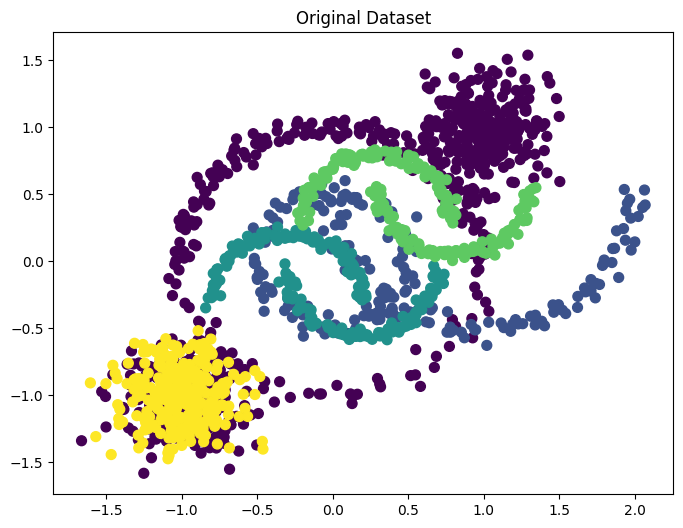

In [7]:
from sklearn.datasets import make_moons

# Generate additional structures
X3, y3 = make_moons(n_samples=200, noise=0.05)
X3 = X3 / 2 - 0.3  # scale and shift
y3 = 2*np.ones_like(y3)  # label for the new structure

X4, y4 = make_moons(n_samples=200, noise=0.05)
X4 = X4 / 2 + 0.3  # scale and shift
y4 = 3*np.ones_like(y4)  # label for the new structure

X5, y5 = make_blobs(n_samples=300, centers=[(-1,-1)], cluster_std=0.2)
y5 = 4*np.ones_like(y5)  # label for the new structure

# Combine all structures into a single dataset
X_large = np.vstack((X, X3, X4, X5))
y_large = np.concatenate((y, y3, y4, y5))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=y_large, s=50, cmap='viridis')
plt.title('Original Dataset')
plt.show()

#### Determine whether data can be clustered via Hopkins statistic:

Source:
Anita Chowksey, Hopkins-Statistic-Clustering-Tendency, https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency

- The **Hopkins statistic H** (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.
- It belongs to the family of sparse sampling tests. 
- It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed.
  
**Interpretation**:

A value for **H** higher than 0.75 indicates a clustering tendency at the 90% confidence level.

The null and the alternative hypotheses are defined as follow:

- **Null hypothesis:** The data set X is uniformly distributed (i.e., no meaningful clusters).

- **Alternative hypothesis:** The data set X is not uniformly distributed (i.e., contains meaningful clusters).

- Therefore, we can interpret Hopkins' statistic in the following manner:

    * If the value is between {0.01, ...,0.3}, the data is regularly spaced.
    
    * If the value is around 0.5, it is random.
    
    * If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [30]:
# !pip install pyclustertend 

In [31]:
# from pyclustertend import hopkins
# from sklearn.preprocessing import scale

# hopkins(X_large, X_large.shape[0])

In [32]:
# hopkins(scale(X_large), X_large.shape[0])

In [33]:
# Function to compute hopkins's statistic for the dataframe X

# Source:
# Anita Chowksey, Hopkins-Statistic-Clustering-Tendency, https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

def hopkins_statistic(X):
    # X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0), (sample_size , X.shape[1]))
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H
    

In [34]:
hopkins_statistic(X_large)

0.9035736560287149

### K-Means

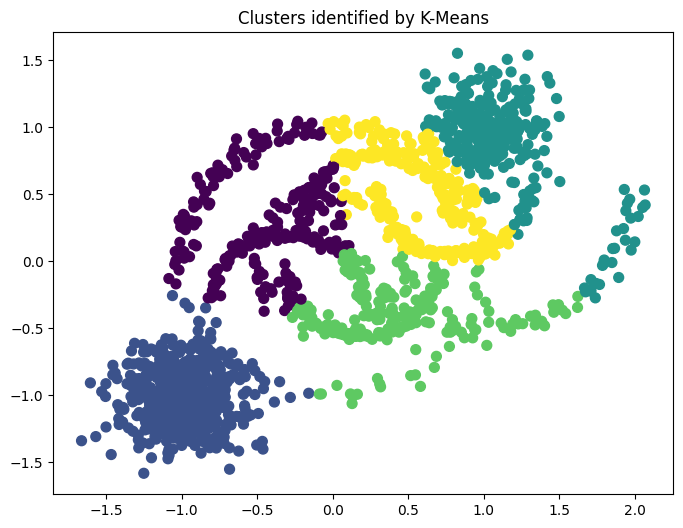

In [8]:
from sklearn.cluster import KMeans

# Apply the KMeans algorithm
clustering_kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the data
clustering_kmeans.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_kmeans.labels_, s=50, cmap='viridis')
plt.title('Clusters identified by K-Means')
plt.show()

#### Find proper k via Elbow Method:

In [9]:
! pip install yellowbrick

In [10]:
from yellowbrick.cluster import KElbowVisualizer

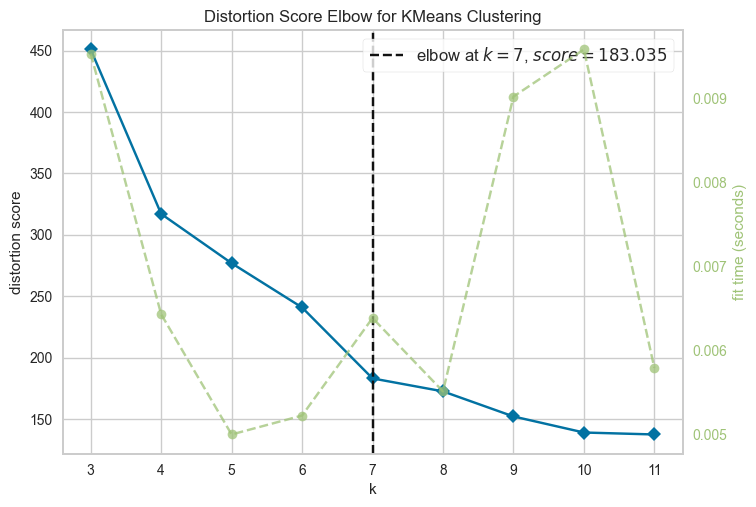

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
visualizer = KElbowVisualizer(clustering_kmeans, k=(3,12))
visualizer.fit(X_large)  # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### OPTICS-DBSCAN

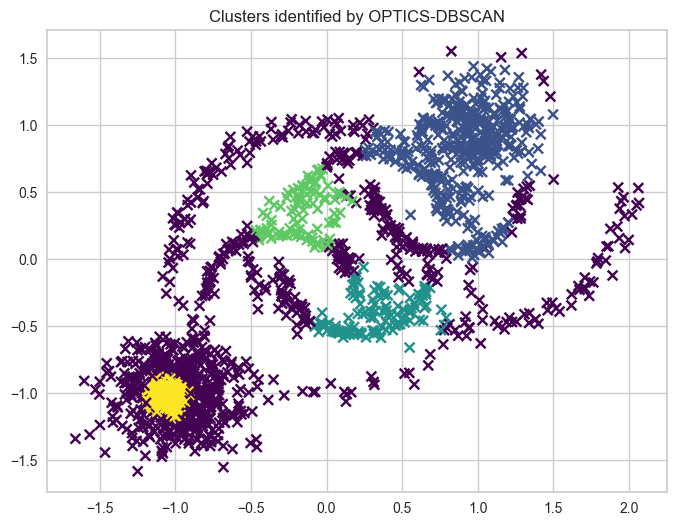

In [12]:
from sklearn.cluster import OPTICS

# Apply the OPTICS DBSCAN algorithm
clustering_optics = OPTICS(min_samples=50, xi=.01, min_cluster_size=.05)

# Fit the data
clustering_optics.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_optics.labels_, s=50, cmap='viridis',marker = 'x')
plt.title('Clusters identified by OPTICS-DBSCAN')
plt.show()

### HDBSCAN Clustering

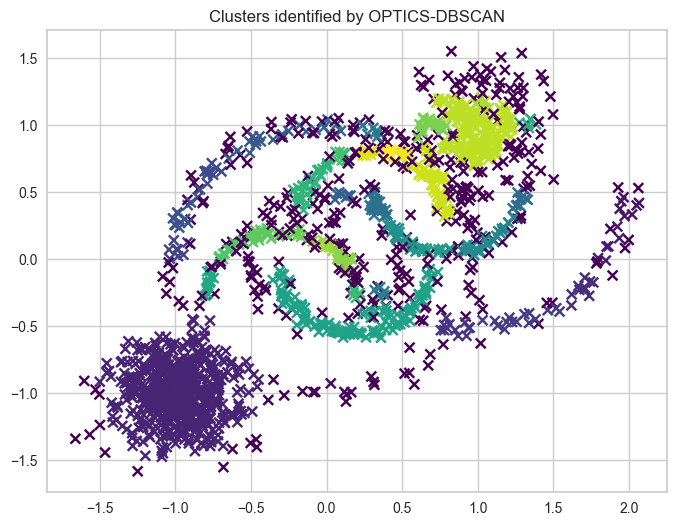

In [13]:
# from sklearn.cluster import HDBSCAN
import hdbscan

# Apply the HDBSCAN algorithm
# clustering_hdbscan = HDBSCAN(min_samples=50, min_cluster_size=10)
# clustering_hdbscan = hdbscan.HDBSCAN(min_cluster_size=20)
# clustering_hdbscan = hdbscan.HDBSCAN(min_cluster_size=10)
clustering_hdbscan = hdbscan.HDBSCAN(min_cluster_size=5)

# Fit the data
clustering_hdbscan.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_hdbscan.labels_, s=50, cmap='viridis',marker = 'x')
plt.title('Clusters identified by OPTICS-DBSCAN')
plt.show()

### Spectral Clustering

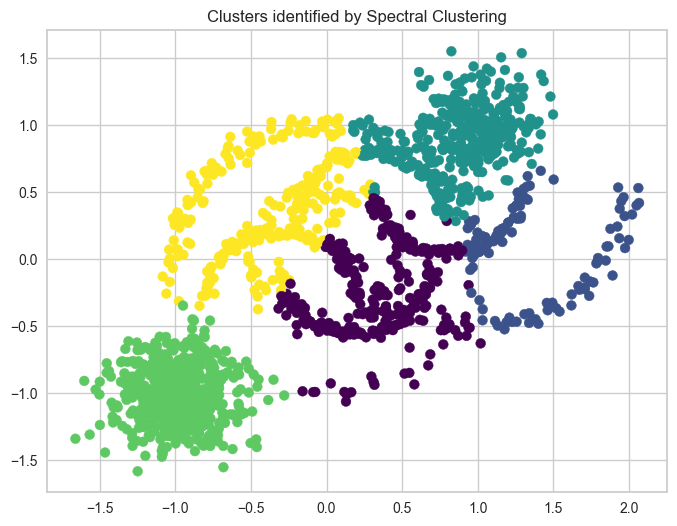

In [14]:
from sklearn.cluster import SpectralClustering

# Apply the Spectral Clustering algorithm
clustering_spectral = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=42)

# Fit the data
clustering_spectral.fit(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=clustering_spectral.labels_, s=50, cmap='viridis')
plt.title('Clusters identified by Spectral Clustering')
plt.show()

### Gaussian Mixture Models (GMM)

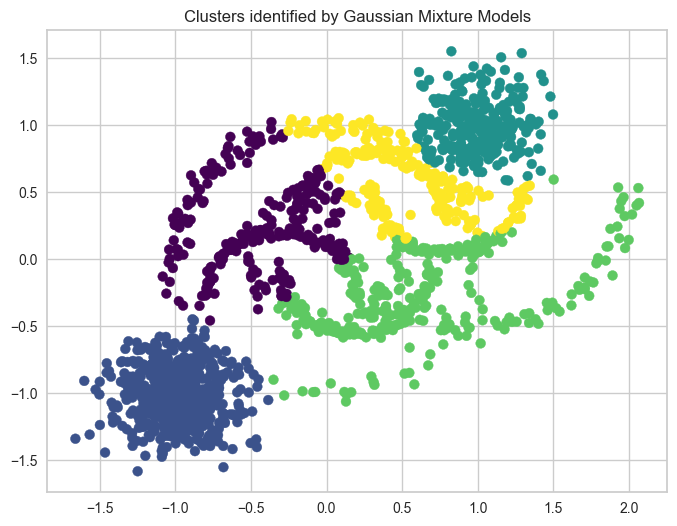

In [15]:
from sklearn.mixture import GaussianMixture

# Apply the Gaussian Mixture Model algorithm
clustering_gmm = GaussianMixture(n_components=5, random_state=42)

# Fit the data and predict the labels
labels_gmm = clustering_gmm.fit_predict(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_gmm, s=50, cmap='viridis')
plt.title('Clusters identified by Gaussian Mixture Models')
plt.show()

### Agglomerative Hierarchical Clustering

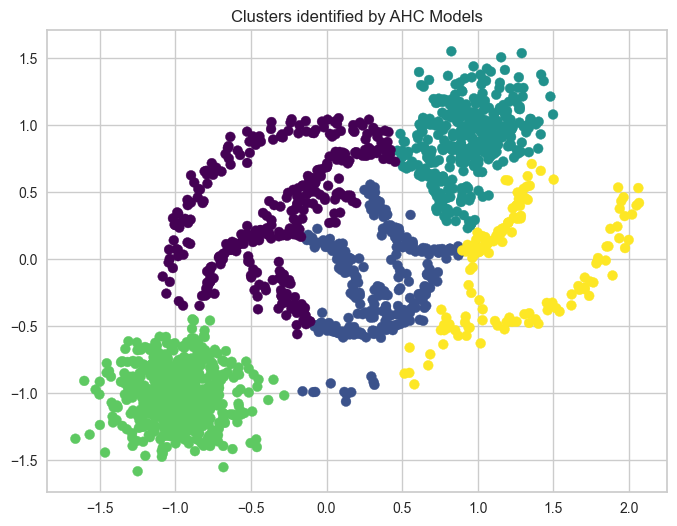

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Apply the Gaussian Mixture Model algorithm
# clustering_agg = AgglomerativeClustering(n_clusters=5, linkage='single')
# clustering_agg = AgglomerativeClustering(n_clusters=5, linkage='complete')
# clustering_agg = AgglomerativeClustering(n_clusters=5, linkage='average')
clustering_agg = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the data and predict the labels
labels_agg = clustering_agg.fit_predict(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_agg, s=50, cmap='viridis')
plt.title('Clusters identified by AHC Models')
plt.show()

### Mean Shift Clustering

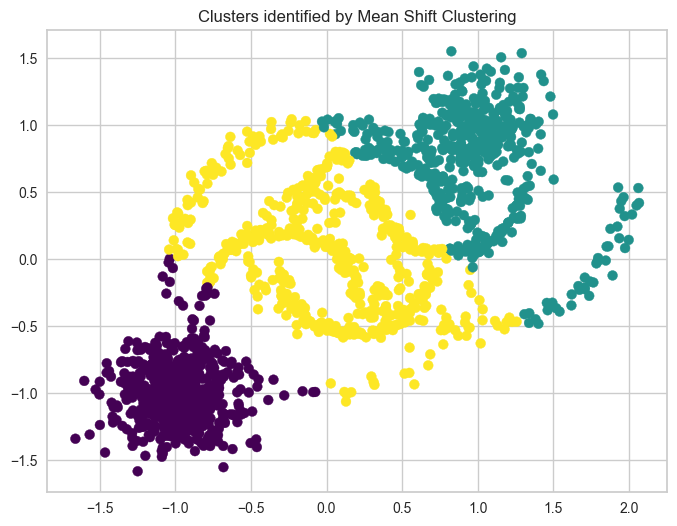

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_large, quantile=0.2, n_samples=500)

# Apply the Mean Shift algorithm
clustering_mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fit the data and predict the labels
labels_mean_shift = clustering_mean_shift.fit_predict(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_mean_shift, s=50, cmap='viridis')
plt.title('Clusters identified by Mean Shift Clustering')
plt.show()

### Affinity Propagation

/Users/markjack/GSU_Fall2024/IFI8410/.venv_ifi8410/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


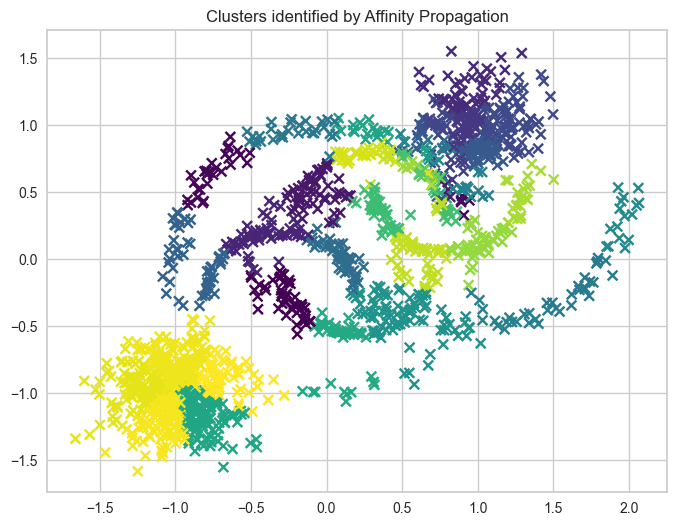

In [18]:
from sklearn.cluster import AffinityPropagation

# Apply the Affinity Propagation algorithm
clustering_affinity = AffinityPropagation(random_state=42)

# Fit the data and predict the labels
labels_affinity = clustering_affinity.fit_predict(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_affinity, s=50, cmap='viridis', marker='x')
plt.title('Clusters identified by Affinity Propagation')
plt.show()

### BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

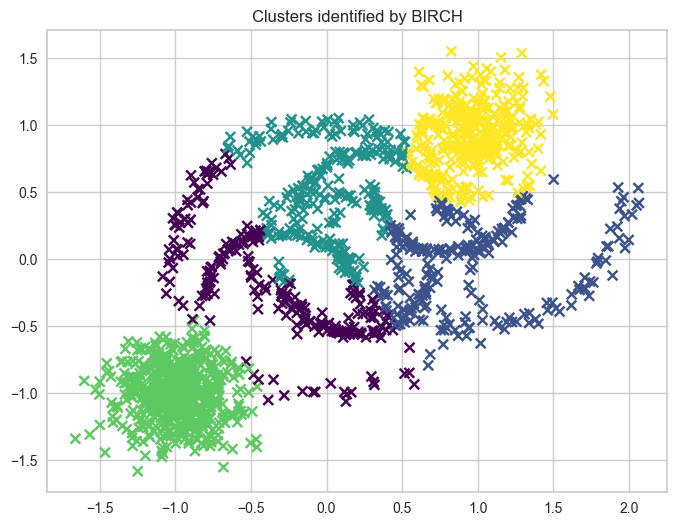

In [19]:
from sklearn.cluster import Birch

# Apply the Affinity Propagation algorithm
clustering_birch = Birch(n_clusters=5)
# clustering_birch = Birch(n_clusters=6)
# clustering_birch = Birch(n_clusters=None)

# Fit the data and predict the labels
labels_birch = clustering_birch.fit_predict(X_large)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_large[:, 0], X_large[:, 1], c=labels_birch, s=50, cmap='viridis', marker='x')
plt.title('Clusters identified by BIRCH')
plt.show()